In [9]:
import pickle
import matplotlib.pyplot as plt
import os

# Function to load jump objects from a pickle file
def load_jump_objects(filename):
    with open(filename, "rb") as file:
        return pickle.load(file)

# Directory containing the pickle files
directory = "../"  # Update this to the appropriate directory if needed

# Load all pickle files and store jumps in a dictionary
jump_data = {}
for i in range(1, 13):  # Assuming "Subject1.pkl" to "Subject12.pkl"
    filename = os.path.join(directory, f"Subject{i}.pkl")
    jumps = load_jump_objects(filename)
    jump_data[f"Subject{i}"] = jumps

jump_data["Subject3"].pop(6)

Jump detected at 1733437697.93 seconds
Lower Back - Accel points: 297, Gyro points: 144
Wrist - Accel points: 255, Gyro points: 124
Thigh - Accel points: 99, Gyro points: 3

In [11]:
# Print jump height and landing impact jerk for each jump of every subject
for subject, jumps in jump_data.items():
    print(f"{subject}:")
    for jump_idx, jump in enumerate(jumps):
        jump_height = jump.metrics.get("height", None)
        landing_impact_jerk = jump.metrics.get("landing_impact_jerk", None)
        print(
            f"  Jump {jump_idx + 1}: Height = {jump_height}, Jerk = {landing_impact_jerk}"
        )
    print("\n")

Subject1:
  Jump 1: Height = 0.2171995184982234, Jerk = 8.165723169715852
  Jump 2: Height = 0.28015494055217044, Jerk = 6.078923778951518
  Jump 3: Height = 0.3934235215362478, Jerk = 5.59315394825097
  Jump 4: Height = 0.4419383541039079, Jerk = 9.035698228117827
  Jump 5: Height = 0.39205487251730553, Jerk = 8.803859311127365
  Jump 6: Height = 0.3969287619479801, Jerk = 2.218966540955221


Subject2:
  Jump 1: Height = 0.33147247691323833, Jerk = 20.960696706243947
  Jump 2: Height = 0.39770859444409895, Jerk = 20.184336923415273
  Jump 3: Height = 0.36241029209467, Jerk = 10.070021324276846
  Jump 4: Height = 0.39700461472406723, Jerk = 6.679991780169332
  Jump 5: Height = 0.3562678103993054, Jerk = 24.10587151269705
  Jump 6: Height = 0.3237289738862999, Jerk = 22.138675324891764


Subject3:
  Jump 1: Height = 0.09812095194316761, Jerk = 6.836478046909312
  Jump 2: Height = 0.21390152265245072, Jerk = 1.5201145347546727
  Jump 3: Height = 0.2436888092699192, Jerk = 8.5028068867972

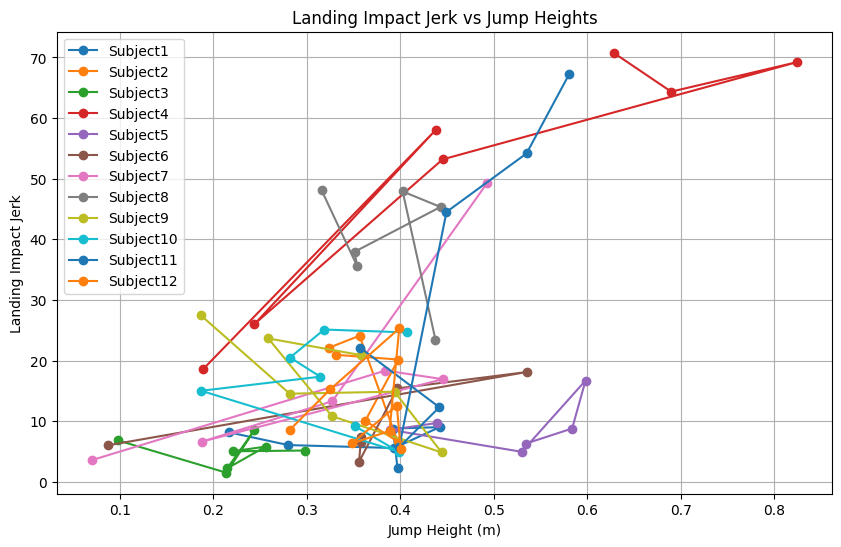

In [18]:
# Prepare data for plotting
plt.figure(figsize=(10, 6))
for subject, jumps in jump_data.items():
    heights = [jump.metrics.get("height", 0) for jump in jumps if jump.metrics]
    landing_jerks = [
        jump.metrics.get("landing_impact_jerk", 0) for jump in jumps if jump.metrics
    ]
    plt.plot(heights, landing_jerks, marker="o", label=subject)  # Swapped axes

# Customize the plot
plt.title("Landing Impact Jerk vs Jump Heights")
plt.xlabel("Jump Height (m)")
plt.ylabel("Landing Impact Jerk")
plt.legend()
plt.grid(True)
plt.show()

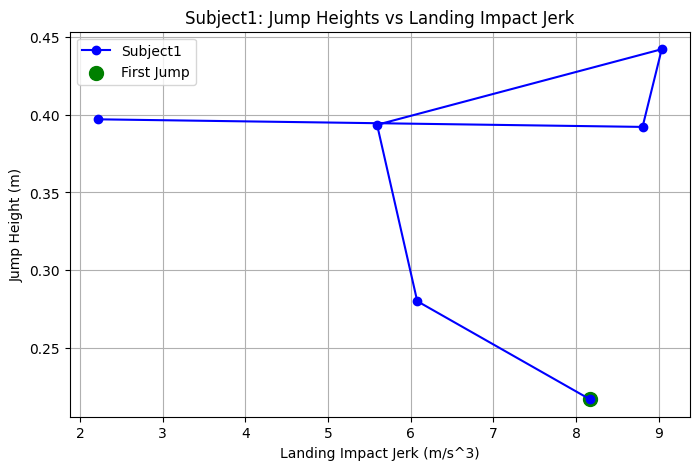

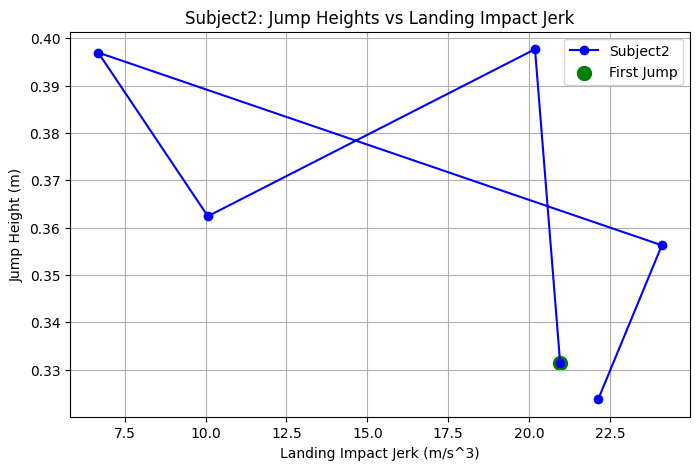

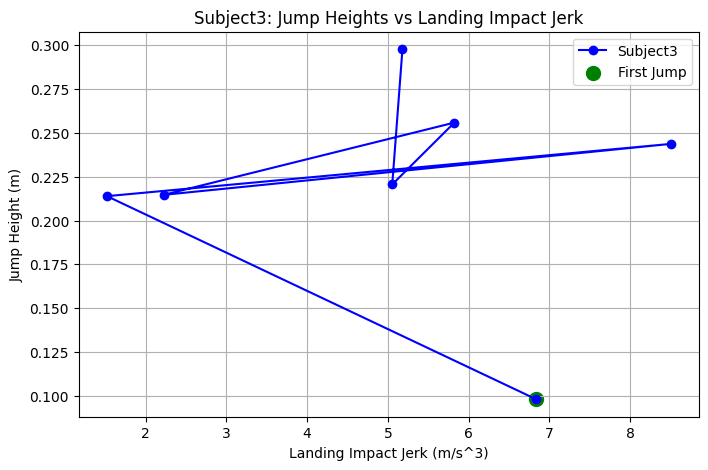

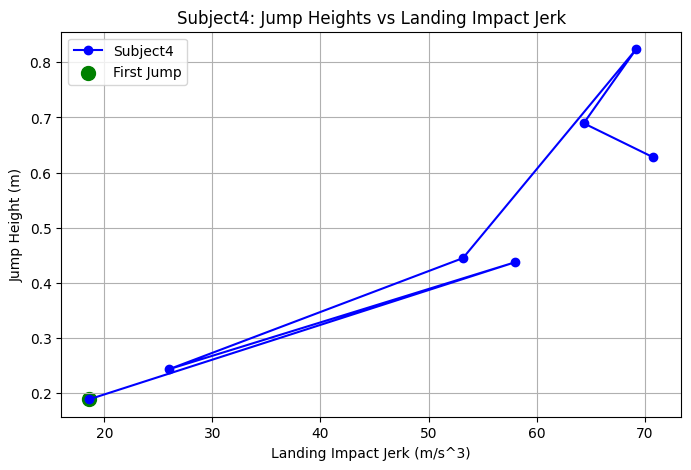

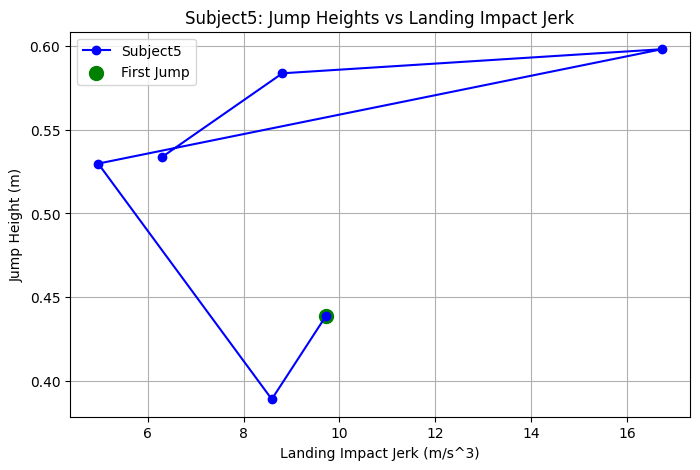

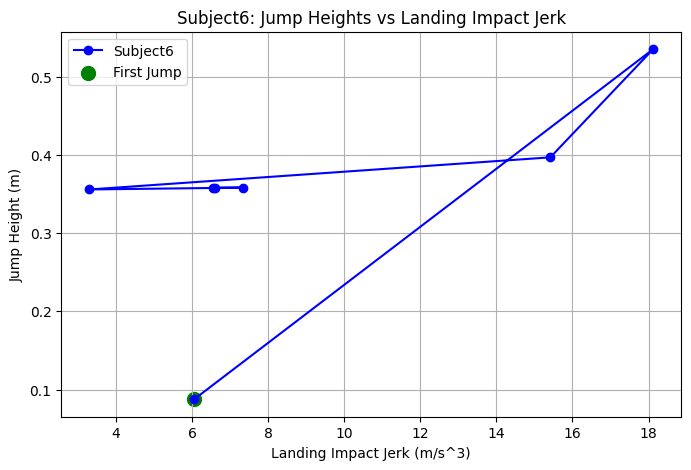

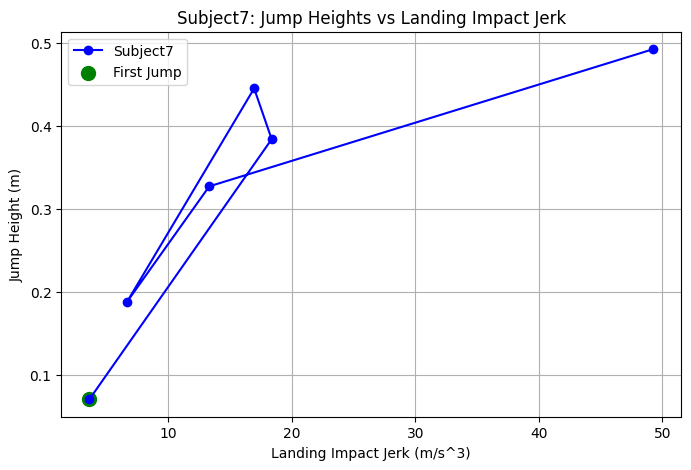

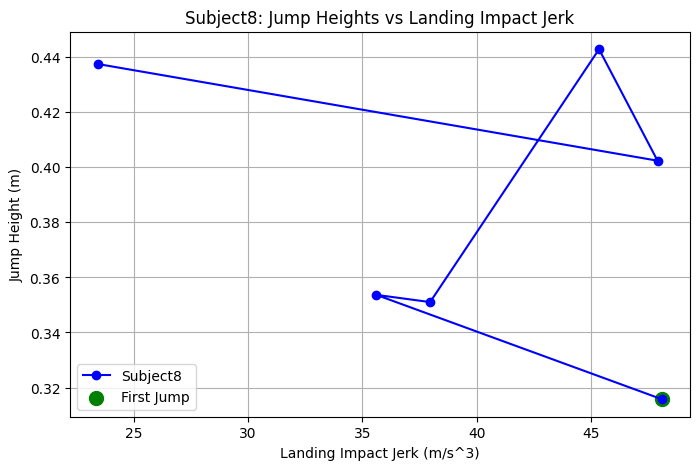

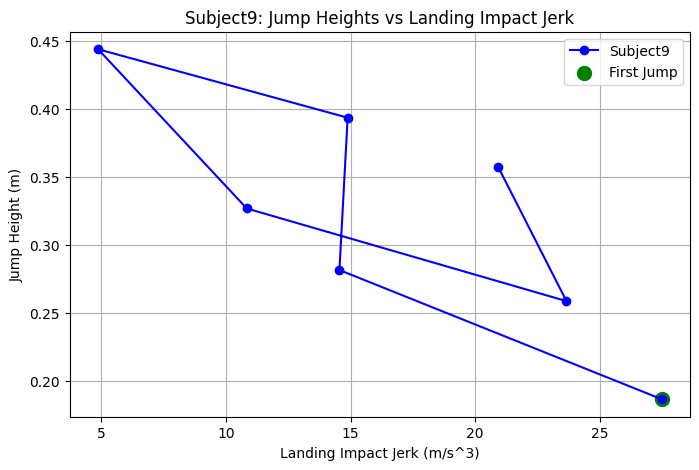

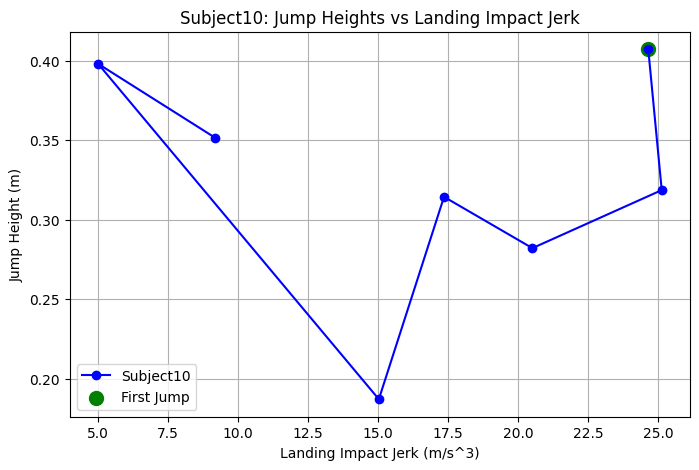

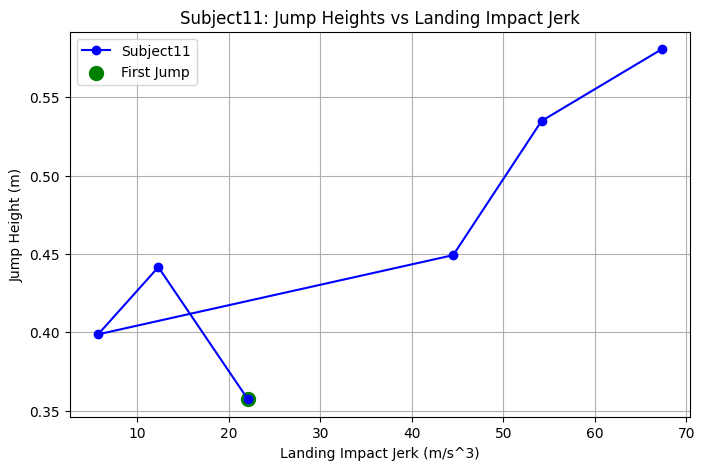

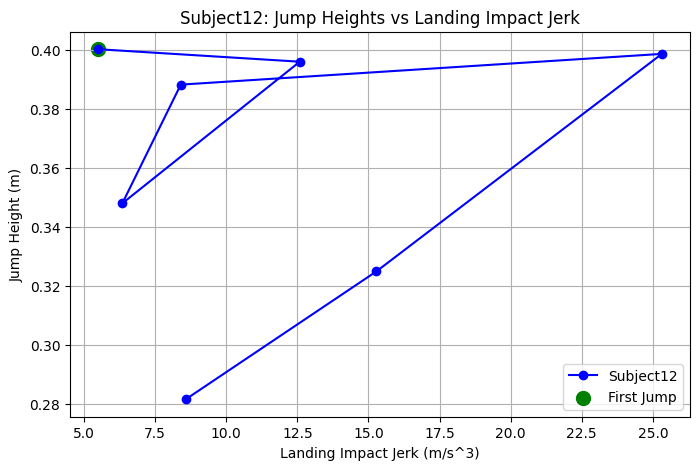

In [17]:
import matplotlib.pyplot as plt

# Plot each subject's jumps individually
for subject, jumps in jump_data.items():
    heights = [jump.metrics.get("height", 0) for jump in jumps if jump.metrics]
    landing_jerks = [
        jump.metrics.get("landing_impact_jerk", 0) for jump in jumps if jump.metrics
    ]

    # Create a new figure for each subject
    plt.figure(figsize=(8, 5))

    # Plot the entire line connecting all points
    plt.plot(landing_jerks, heights, marker="o", label=subject, color="blue")

    # Highlight the first point in green
    if landing_jerks and heights:  # Check if there are points to plot
        plt.scatter(
            landing_jerks[0], heights[0], color="green", s=100, label="First Jump"
        )

    # Customize the plot
    plt.title(f"{subject}: Jump Heights vs Landing Impact Jerk")
    plt.xlabel("Landing Impact Jerk (m/s^3)")
    plt.ylabel("Jump Height (m)")
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

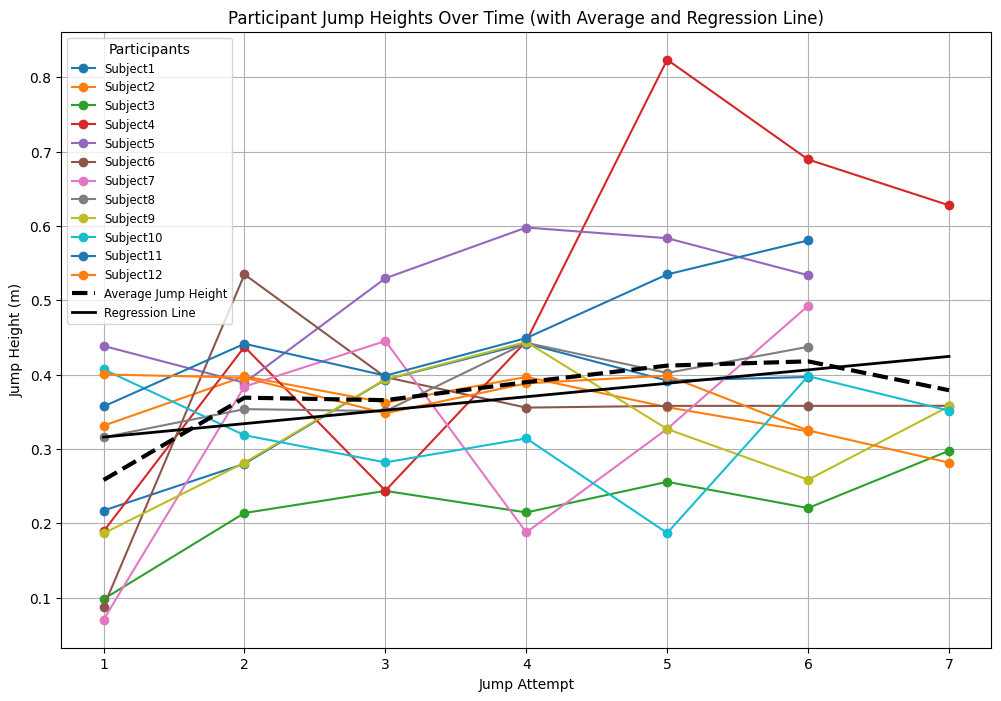

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data for plotting
plt.figure(figsize=(12, 8))

# Collect heights for all participants at each time index
all_heights = []
max_jumps = max(
    len(jumps) for jumps in jump_data.values()
)  # Find the maximum number of jumps

for subject, jumps in jump_data.items():
    # Extract heights and assign a time index (e.g., jump number as time)
    heights = [jump.metrics.get("height", 0) for jump in jumps if jump.metrics]
    time_indices = list(range(1, len(heights) + 1))

    # Plot heights over time for each participant
    plt.plot(time_indices, heights, marker="o", label=subject)

    # Append heights to all_heights, padding with None for shorter sequences
    if len(all_heights) < len(heights):
        all_heights.extend([[] for _ in range(len(heights) - len(all_heights))])
    for idx, height in enumerate(heights):
        all_heights[idx].append(height)

# Calculate the average heights at each time index
average_heights = [np.mean(heights) if heights else 0 for heights in all_heights]
time_indices = np.array(range(1, len(average_heights) + 1))

# Plot the average line
plt.plot(
    time_indices,
    average_heights,
    color="black",
    linewidth=3,
    linestyle="--",
    label="Average Jump Height",
)

# Fit a regression line through the average heights
time_indices_reshaped = time_indices.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(time_indices_reshaped, average_heights)
regression_line = regressor.predict(time_indices_reshaped)

# Plot the regression line
plt.plot(
    time_indices,
    regression_line,
    color="black",
    linewidth=2,
    label="Regression Line",
)

# Customize the plot
plt.title("Participant Jump Heights Over Time (with Average and Regression Line)")
plt.xlabel("Jump Attempt")
plt.ylabel("Jump Height (m)")
plt.legend(title="Participants", fontsize="small", title_fontsize="medium")
plt.grid(True)
plt.show()